# Install & Import

In [1]:
#! pip uninstall gym

In [2]:
! pip install gym==0.21.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached gym-0.21.0.tar.gz (1.5 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gym
  Running setup.py clean for gym
Failed to build gym
  Running setup.py install for gym ... done
  DEPRECATION: gym was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. pip 23.1 will enforce this behaviour change. A possible replacement is to fix the wheel build issue reported above. Discussion can be found at https://github.com/pypa/pip/issues/8368


In [3]:
!pip install setuptools==66

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import torch
print(torch.__version__)

2.0.0+cu118


In [5]:
#!pip install torch==1.12.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

In [6]:
! pip install gym_anytrading

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install stable_baselines3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached stable_baselines3-1.8.0-py3-none-any.whl (174 kB)
  Using cached importlib_metadata-4.13.0-py3-none-any.whl (23 kB)


In [9]:
# Gym stuff
import gym
import gym_anytrading
import torch

# Stable-baselines3
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

#Other
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get data

In [10]:
# Read file
df=pd.read_csv("https://raw.githubusercontent.com/nicknochnack/Reinforcement-Learning-for-Trading/main/data/gmedata.csv")

In [11]:
df.head()

,Date,Open,High,Low,Close,Volume
0,03/12/2021,275.00,295.50,262.27,264.5,"25,845,900"
1,03/11/2021,241.64,281.50,232.60,260.0,"28,312,490"
2,03/10/2021,269.43,348.50,172.00,265.0,"71,570,570"
3,03/09/2021,217.71,249.85,208.51,246.9,"39,099,328"
4,03/08/2021,154.89,210.87,146.10,194.5,"63,565,621"


In [12]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [13]:
# Convert to correct date type
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [14]:
# Sort 
df.sort_values("Date",ascending=True,inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
250,2020-03-16,3.93,4.57,3.90,4.37,"4,866,696"
249,2020-03-17,4.40,4.65,4.11,4.23,"3,562,210"
248,2020-03-18,4.10,4.25,3.50,3.77,"3,651,709"
247,2020-03-19,3.71,4.20,3.55,4.19,"5,039,539"
246,2020-03-20,4.08,4.08,3.65,3.76,"7,722,194"


In [15]:
# Set date column as index
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-03-16,3.93,4.57,3.90,4.37,"4,866,696"
2020-03-17,4.40,4.65,4.11,4.23,"3,562,210"
2020-03-18,4.10,4.25,3.50,3.77,"3,651,709"
2020-03-19,3.71,4.20,3.55,4.19,"5,039,539"
2020-03-20,4.08,4.08,3.65,3.76,"7,722,194"


In [16]:
# Pass data to gym environment
env=gym.make('stocks-v0',df=df,frame_bound=(5,100),window_size=5)
env.signal_features


array([[ 4.37,  0.  ],
       [ 4.23, -0.14],
       [ 3.77, -0.46],
       [ 4.19,  0.42],
       [ 3.76, -0.43],
       [ 3.81,  0.05],
       [ 4.16,  0.35],
       [ 4.17,  0.01],
       [ 4.41,  0.24],
       [ 4.22, -0.19],
       [ 3.65, -0.57],
       [ 3.5 , -0.15],
       [ 3.25, -0.25],
       [ 2.85, -0.4 ],
       [ 2.8 , -0.05],
       [ 3.09,  0.29],
       [ 3.27,  0.18],
       [ 3.41,  0.14],
       [ 3.89,  0.48],
       [ 4.74,  0.85],
       [ 5.95,  1.21],
       [ 5.27, -0.68],
       [ 5.03, -0.24],
       [ 4.88, -0.15],
       [ 5.61,  0.73],
       [ 4.78, -0.83],
       [ 4.89,  0.11],
       [ 4.7 , -0.19],
       [ 4.77,  0.07],
       [ 5.82,  1.05],
       [ 5.64, -0.18],
       [ 6.04,  0.4 ],
       [ 5.73, -0.31],
       [ 6.05,  0.32],
       [ 5.48, -0.57],
       [ 5.39, -0.09],
       [ 4.93, -0.46],
       [ 4.87, -0.06],
       [ 4.98,  0.11],
       [ 4.76, -0.22],
       [ 4.54, -0.22],
       [ 4.21, -0.33],
       [ 4.13, -0.08],
       [ 4.

# Build environment

info {'total_reward': 0.9300000000000019, 'total_profit': 0.9257747651703361, 'position': 0}


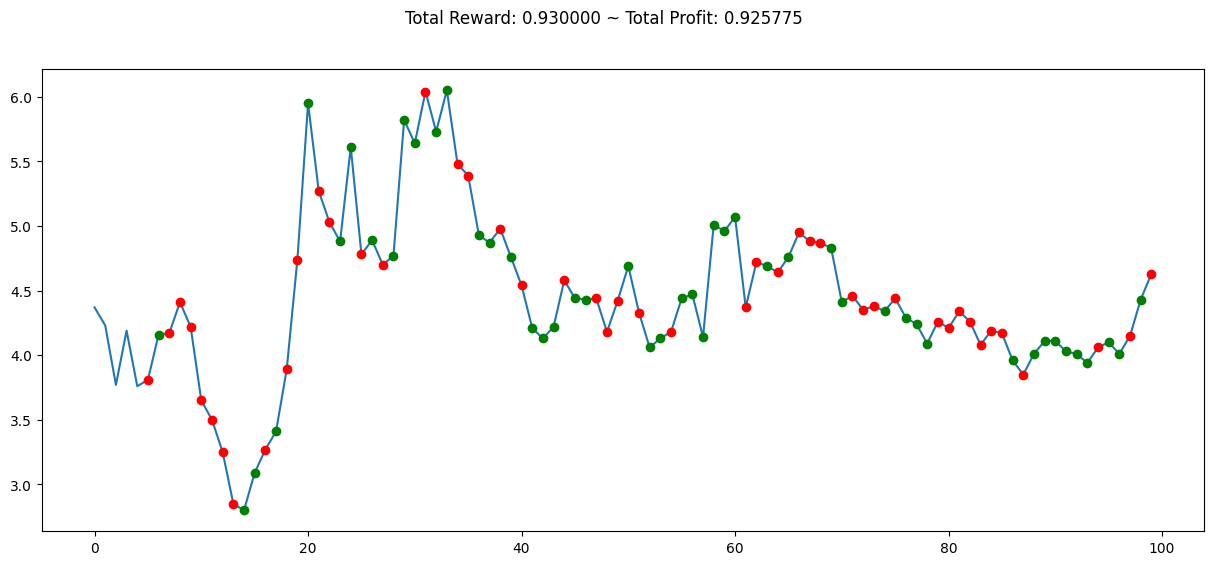

In [17]:
state=env.reset()
while True:
    action=env.action_space.sample()
    n_state,reward,done,info=env.step(action)
    if done:
        print("info",info)
        break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# Build environment using stable-baselines3 & train

In [18]:
# Wrap gym environment into stable_baselines3 environment
env_maker=lambda:gym.make('stocks-v0',df=df,frame_bound=(5,100),window_size=5)
env=DummyVecEnv([env_maker])

In [19]:
# Set up algorithm & train
model=A2C('MlpPolicy',env,verbose=1)
model.learn(total_timesteps=10000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 578      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.396   |
|    explained_variance | -0.257   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.0905  |
|    value_loss         | 0.0161   |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 582       |
|    iterations         | 200       |
|    time_elapsed       | 1         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -0.208    |
|    explained_variance | -10.1     |
|    learning_rate      | 0.0007    |
|    n_updates          | 199       |
|    policy_loss        | -0.000188 |
|    valu

# Evaluation

In [20]:
env=gym.make('stocks-v0',df=df,frame_bound=(90,110),window_size=5)
obs=env.reset()
while True:
  obs=obs[np.newaxis,...]
  action,_states=model.predict(obs)
  obs,rewards,done,info=env.step(action)
  if done:
    print("info",info)
    break

info {'total_reward': 0.0, 'total_profit': 1.0, 'position': 0}


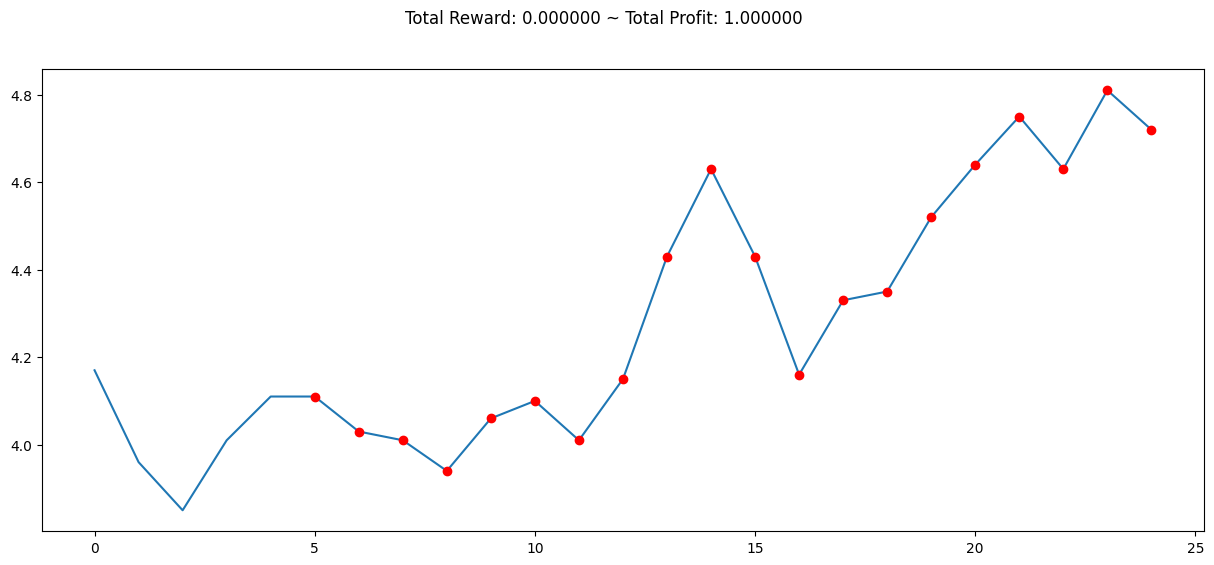

In [21]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# Add custom indicators

In [22]:
!pip install finta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [24]:
# Change volume column to float type
df['Volume']=df['Volume'].apply(lambda x: float(x.replace(",","")))
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [25]:
# Calculate SMA,RSI,OBV
df['SMA']=TA.SMA(df,12)
df['RSI']=TA.RSI(df)
df['OBV']=TA.OBV(df)
df.fillna(0,inplace=True)

df.head(15)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-03-16,3.93,4.57,3.90,4.37,4866696.0,0.000000,0.000000,0.0
2020-03-17,4.40,4.65,4.11,4.23,3562210.0,0.000000,0.000000,-3562210.0
2020-03-18,4.10,4.25,3.50,3.77,3651709.0,0.000000,0.000000,-7213919.0
2020-03-19,3.71,4.20,3.55,4.19,5039539.0,0.000000,43.394834,-2174380.0
2020-03-20,4.08,4.08,3.65,3.76,7722194.0,0.000000,29.351457,-9896574.0
2020-03-23,3.58,3.86,3.50,3.81,6009784.0,0.000000,32.102964,-3886790.0
2020-03-24,3.95,4.21,3.89,4.16,6805659.0,0.000000,47.512950,2918869.0
2020-03-25,4.15,4.49,4.04,4.17,3592059.0,0.000000,47.876947,6510928.0
2020-03-26,4.24,4.71,4.24,4.41,6210979.0,0.000000,55.799557,12721907.0


In [26]:
# Create new environment
def add_signals(env):
  start=env.frame_bound[0]-env.window_size
  end=env.frame_bound[1]
  prices=env.df.loc[:,'Low'].to_numpy()[start:end]
  signal_features=env.df.loc[:,['Low','Volume','SMA','RSI','OBV']].to_numpy()[start:end]
  return prices,signal_features

In [28]:
class MyCustomEnv(StocksEnv):
  _process_data=add_signals

env2=MyCustomEnv(df=df,window_size=12,frame_bound=(12,50))

In [29]:
env2

In [30]:
env2.prices

array([3.9 , 4.11, 3.5 , 3.55, 3.65, 3.5 , 3.89, 4.04, 4.24, 4.15, 3.65,
       3.5 , 3.12, 2.85, 2.57, 2.83, 3.1 , 3.2 , 3.49, 4.16, 5.14, 4.9 ,
       4.88, 4.43, 4.78, 4.76, 4.83, 4.58, 4.66, 4.81, 5.06, 5.45, 5.64,
       5.45, 5.4 , 5.35, 4.9 , 4.65, 4.82, 4.75, 4.46, 4.07, 3.96, 4.04,
       4.36, 4.37, 4.34, 4.4 , 4.13, 4.33])

In [31]:
df.head()

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-03-16,3.93,4.57,3.90,4.37,4866696.0,0.0,0.000000,0.0
2020-03-17,4.40,4.65,4.11,4.23,3562210.0,0.0,0.000000,-3562210.0
2020-03-18,4.10,4.25,3.50,3.77,3651709.0,0.0,0.000000,-7213919.0
2020-03-19,3.71,4.20,3.55,4.19,5039539.0,0.0,43.394834,-2174380.0
2020-03-20,4.08,4.08,3.65,3.76,7722194.0,0.0,29.351457,-9896574.0


In [33]:
# Build & train
from stable_baselines3.common.vec_env import SubprocVecEnv
env_maker=lambda:env2
env=SubprocVecEnv([env_maker])

In [36]:
model=A2C("MlpPolicy",env,verbose=1)
model.learn(total_timesteps=10000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 354      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.675   |
|    explained_variance | -626     |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.0601  |
|    value_loss         | 0.0251   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 378      |
|    iterations         | 200      |
|    time_elapsed       | 2        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.598   |
|    explained_variance | 0.405    |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 0.174    |
|    value_loss      

In [37]:
# Evaluation
env=MyCustomEnv(df=df,window_size=12,frame_bound=(80,120))
obs=env.reset()
while True:
  obs=obs[np.newaxis,...]
  action,_states=model.predict(obs)
  obs,rewards,done,info=env.step(action)
  if done:
    print("info",info)
    break

info {'total_reward': 0.08000000000000007, 'total_profit': 1.526094607021167, 'position': 1}


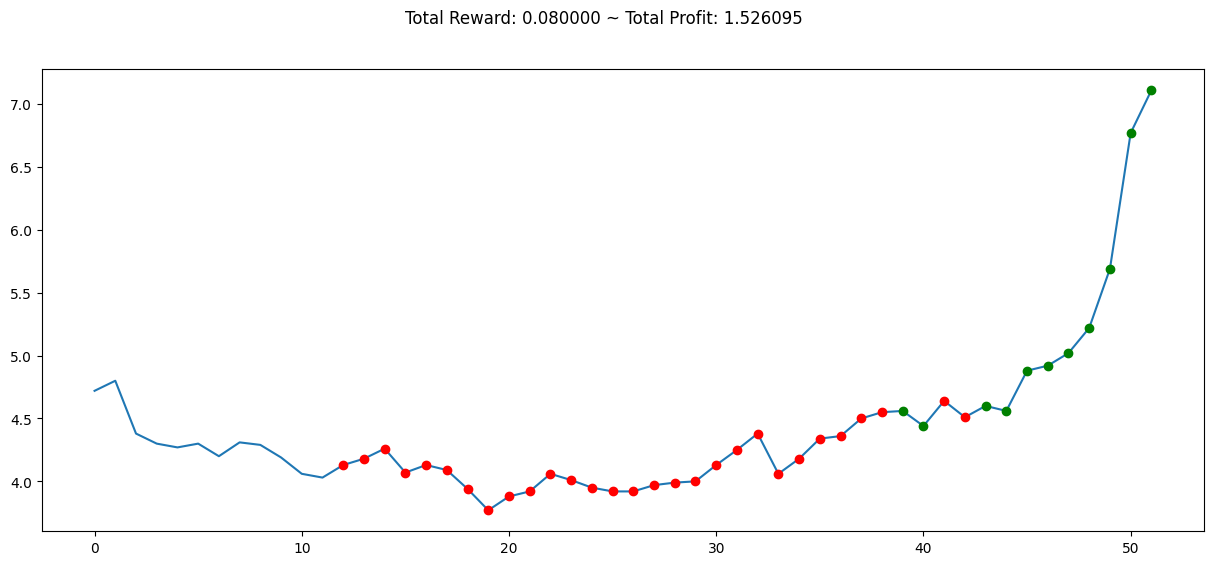

In [38]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()